In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lets load data

In [2]:
data = pd.read_csv(r'D:\Python Projects\Diabets Prediction\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

Проверим наши данные на сбалансированность 

In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Как мы видим, значения 0 (нет диабета) почти в 2 раза превышают значения 1 (есть диабет). Это не есть хорошо

## **Данные не сбаланисрованны**

## **Exploratory Data Analysis**

Lets check **missing** values in our dataset columns

In [6]:
data.info()
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check dataset for **duplicate** values

In [7]:
data[data.duplicated()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Согласно данным тут есть женщина, которая в свои 47 лет имеет 17 беременностей 
data[data['Pregnancies'] == 17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [10]:
data.describe().loc['min']

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

Скорее всего в наш данных нет **пустых** значений, так как они заполняются **0**, потому что не может быть чтобы у человека было, например, кровянное давление равное 0.


Посмотрим сколько зануленных значений в колонках. Такие колонки как **Pregnacies, Outcome, Age, DiabetesPedigreeFunction** нам не нужны потому что в них могут быть 0 значения или минимальное значение в них не 0.

In [11]:
(data.iloc[:, 1:-3] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Проверим наши переменные (feature) на наличие **выбросов (outliers)**

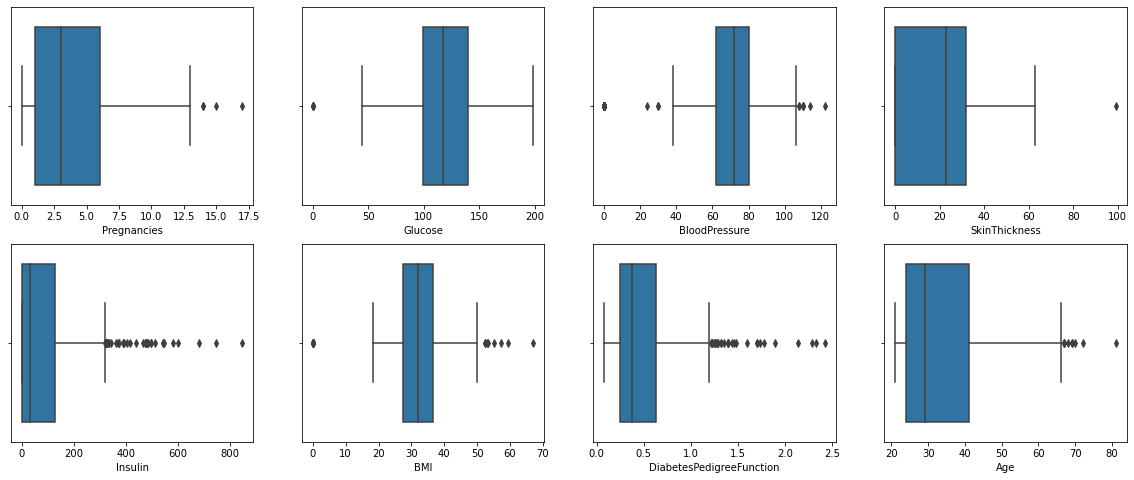

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
axes = axes.ravel() # Сплющивает массив в строку 
for i, columns in enumerate(data.loc[:, 'Pregnancies': 'Age']):
      sns.boxplot(x=data[columns], ax=axes[i])

Как видно по графикам, у нас есть очень много **выбросов (outliers)**, особенно у колонок **Insulin и DiabetesPedigreeFunction**

Или попроще... Но не так красиво 

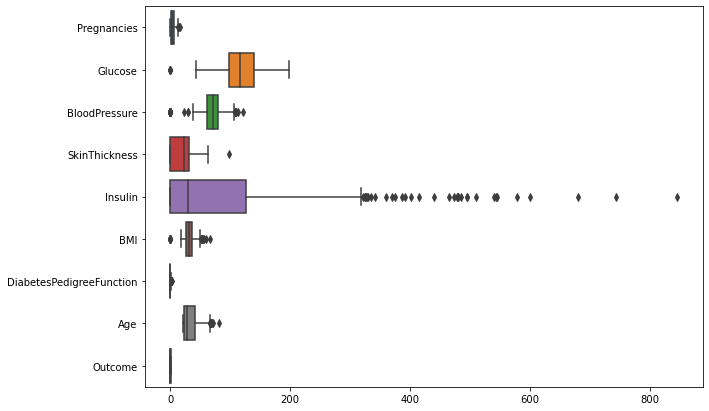

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, orient='h')
plt.show()

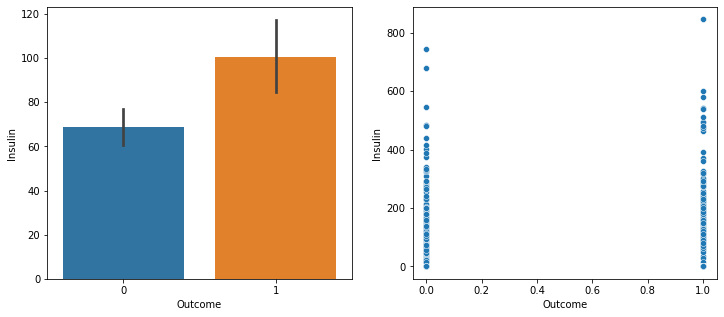

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=data['Outcome'], y=data['Insulin'], ax=axes[0])
sns.scatterplot(x=data['Outcome'], y=data['Insulin'], ax=axes[1])
plt.show()

Из точечного графика видно, что у людей у которых **высокий инсулин** чаще наблюдается диабет

Заменим нулевые значения в столбцах на **средние** значения в этих столбцах.

In [15]:
columns_with_zero_values = data.loc[:, 'Glucose':'BMI'].columns

In [16]:
#Сравнение срежних значений: (не учитываются нулевые значения, учитываются нулевые значения)
(data[data['Insulin'] != 0]['Insulin']).mean(), data['Insulin'].mean()

(155.5482233502538, 79.79947916666667)

При замене **нулевых** значение сделаем два варианта расчета:
1. Подсчет средних значений проводится **без учета нулевых значений** 
2. Подсчет средних значений проводится **с учетом нулевых значений**

In [17]:
for column in columns_with_zero_values:
#     data[column].replace(to_replace=0, value=(data[data[column] != 0][column]).mean(), inplace=True) # без учета нулевых значений

    data[column].replace(to_replace=0, value=data[column].mean(), inplace=True) # с учетом нулевых значений

In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Посмотрим, как изменились наши данные

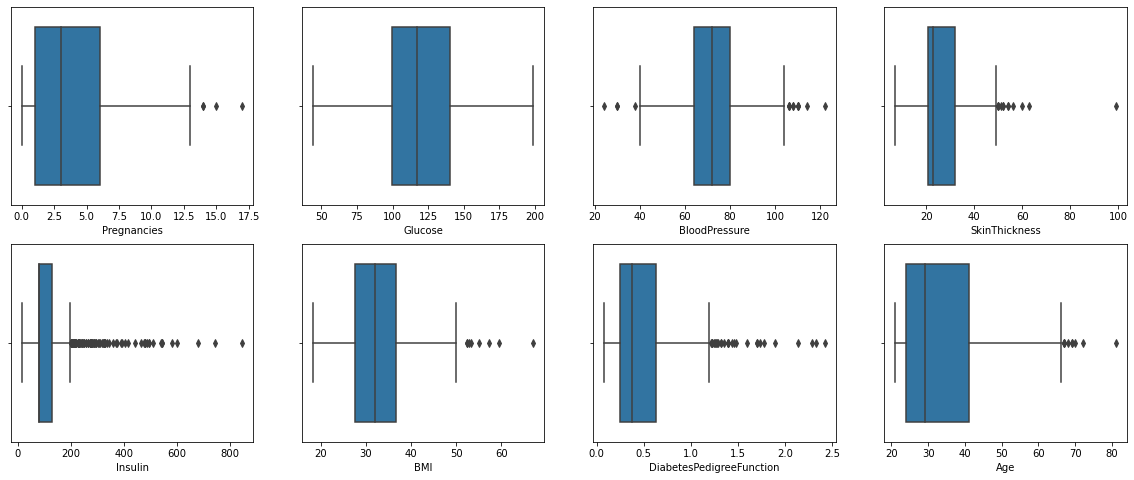

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
axes = axes.ravel() # Сплющивает массив в строку 
for i, columns in enumerate(data.loc[:, 'Pregnancies': 'Age']):
    sns.boxplot(x=data[columns], ax=axes[i], orient='h')
#     sns.boxplot(y=data[columns], ax=axes[i], orient='v')

 На этом обработка данных закончилась, теперь можно приступать к построению моделей машинного обучения

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [21]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Разобьем данные на **тренировочные** и **тестовые**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

**Отнормируем** наши данные для того, чтобы все наши данные имели одинаковую размерность, и алгоритмы правильно работали

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.55371914, -0.68573062, -1.1931424 , ..., -1.24040995,
         0.44725233, -0.88114784],
       [-0.55371914, -0.84914457, -0.37331035, ..., -1.69710526,
         0.54827149, -0.6273045 ],
       [ 1.53389916, -0.52231667, -1.68504164, ..., -0.20916248,
        -0.26906535,  0.72652665],
       ...,
       [ 1.83213035, -0.45695109, -0.53727676, ..., -0.03237719,
        -0.59967351,  0.72652665],
       [ 0.04274323, -1.01255852, -0.20934394, ...,  0.07074755,
        -0.06702703, -0.96576229],
       [-1.15018151, -0.91451015, -0.20934394, ...,  1.60288666,
        -0.37008451, -1.05037674]])

# **Training model**

In [48]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, plot_confusion_matrix, classification_report

In [27]:
lr = LogisticRegression(random_state=17)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=17)

In [28]:
prediction = lr.predict(X_test_scaled)
prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [29]:
data_score = []

Проверим на метриках на сколько точная наша модель

**Accuracy_score**

In [30]:
print(f'Accuracy: {round(accuracy_score(y_test, prediction) * 100, 2)}%')
data_score.append(round(accuracy_score(y_test, prediction) * 100, 2))

Accuracy: 77.27%


Данная метрика не очень хорошо подходит для **несбалансированных классов**, а у нас как раз такой случай, поэтому будем использовать такие метрики, как **Precision и Recall**. 



  **Accuracy** - метрика, которая показывает насколько точно модель предсказывает наши данные.  
**Recall** - метрика, которая показывает какое кол-во значение наш алгоритм предсказал правильно.

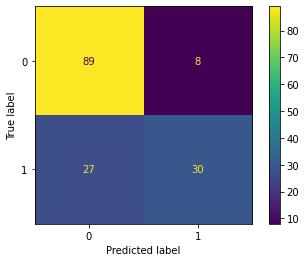

In [31]:
plot_confusion_matrix(lr, X_test_scaled, y_test)
plt.show()

In [32]:
print(f'Precision: {round(precision_score(y_test, prediction) * 100, 2)}%')
data_score.append(round(precision_score(y_test, prediction) * 100, 2))
print(f'Recall: {round(recall_score(y_test, prediction) * 100, 2)}%')
data_score.append(round(recall_score(y_test, prediction) * 100, 2))

Precision: 78.95%
Recall: 52.63%


In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



**Desision tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=17)

In [34]:
tree_prediction = tree.predict(X_test_scaled)
tree_prediction

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [35]:
print(f'Accuracy: {round(accuracy_score(y_test, tree_prediction) * 100, 2)}%')
data_score.append(round(recall_score(y_test, tree_prediction) * 100, 2))
print(f'Precision: {round(precision_score(y_test, tree_prediction) * 100, 2)}%')
data_score.append(round(recall_score(y_test, tree_prediction) * 100, 2))
print(f'Recall: {round(recall_score(y_test, tree_prediction) * 100, 2)}%')
data_score.append(round(recall_score(y_test, tree_prediction) * 100, 2))

Accuracy: 72.08%
Precision: 62.5%
Recall: 61.4%


In [51]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        97
           1       0.62      0.61      0.62        57

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Для данной задачи **решающее дерево** справилось хуже, чем **логистическая регрессия**

Попробуем использовать алгоритм **Deep Learning** - **Multi-layer Perceptron classifier (MLPCalssifier)**

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), random_state=17)
mlp.fit(X_train_scaled, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), random_state=17)

In [37]:
neural_prediction = mlp.predict(X_test_scaled)
neural_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [38]:
print(f'Accuracy: {round(accuracy_score(y_test, neural_prediction) * 100, 2)}%')
data_score.append(round(accuracy_score(y_test, neural_prediction) * 100, 2))
print(f'Precision: {round(precision_score(y_test, neural_prediction) * 100, 2)}%')
data_score.append(round(precision_score(y_test, neural_prediction) * 100, 2))
print(f'Recall: {round(recall_score(y_test, neural_prediction) * 100, 2)}%')
data_score.append(round(recall_score(y_test, neural_prediction) * 100, 2))

Accuracy: 78.57%
Precision: 75.0%
Recall: 63.16%


In [50]:
print(classification_report(y_test, neural_prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        97
           1       0.75      0.63      0.69        57

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

